In [337]:
import pandas as pd 
df=pd.read_csv("CNNDIJ.csv");
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from keras.models import model_from_json
import h5py
from keras.models import load_model



In [338]:
df.head(5)
tc=600;
tc=tc+1

print(df.head())

                                                code  tag
0  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
1  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
2  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
3  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
4  35 105 110 99 108 117 100 101 60 98 105 116 11...    1


In [339]:
trainX,train_Y=df['code'],df['tag']

In [340]:
tmp=[]
for i in trainX:
    k=i.split()
    if(len(k)==600):
        k.append(0)
    
        
    a=np.array(k)
    a=a.astype('float32')
    
    
    a=a.reshape(tc,1)
    tmp.append(a)
train_X=np.array(tmp)
train_X.shape
type(train_X[1][1][0])



numpy.float32

In [341]:


train_X.shape

(132, 601, 1)

In [342]:
train_X=train_X/155 
train_X

array([[[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.38064516],
        [ 0.72258067],
        [ 0.73548388]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.38064516],
        [ 0.72258067],
        [ 0.73548388]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ..., 
       [[ 0.49032259],
        [ 0.49032259],
        [ 0.64516127],
        ..., 
        [ 0.64516127],
        [ 0.58709675],
        [ 0.76129031]],

       [[ 0.49032259],
        [ 0.49032259],
        [ 0.64516127],
        ..., 
        [ 0.64516127],
        [ 0.58709675],
        [ 0.76129031]],

       [[ 0.49032259],
        [ 0.49032259],
        [ 0.64516127],
        ..., 
        [ 0.64516127],
        [ 0.58709675],
        [ 0.76129031]]], dtype=float32)

In [343]:
train_X = train_X.reshape(-1, tc,1, 1)
train_X.shape

(132, 601, 1, 1)

In [344]:
from keras.utils import to_categorical

In [345]:
train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[2])
print('After conversion to one-hot:', train_Y_one_hot[2])


Original label: 1
After conversion to one-hot: [ 0.  1.]


In [346]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.15, random_state=13)

In [347]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((112, 601, 1, 1), (20, 601, 1, 1), (112, 2), (20, 2))

In [348]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [349]:
batch_size = 64
epochs = 25
num_classes = 2

In [350]:
binary_model = Sequential()
binary_model.add(Conv2D(16, kernel_size=(4, 1),activation='linear',input_shape=(tc,1,1),padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D((2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Conv2D(32, (2, 1), activation='linear',padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D(pool_size=(2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Flatten())
binary_model.add(Dense(128, activation='linear'))
binary_model.add(LeakyReLU(alpha=0.1))                  
binary_model.add(Dense(num_classes, activation='softmax'))

In [351]:
binary_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [352]:
binary_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 601, 1, 16)        80        
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 601, 1, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 301, 1, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 301, 1, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 301, 1, 32)        1056      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 301, 1, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 151, 1, 32)        0         
__________

In [353]:
binary_train = binary_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(valid_X, valid_label))

In [354]:
test_eval =binary_model.evaluate(train_X, train_label, verbose=0)

In [355]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.305718455996
Test accuracy: 0.955357142857


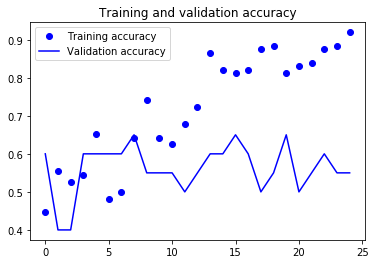

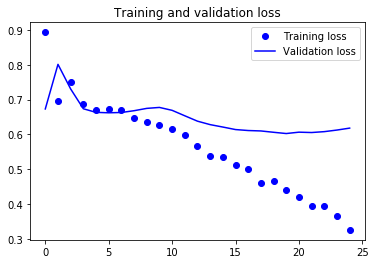

In [356]:
accuracy = binary_train.history['acc']
val_accuracy = binary_train.history['val_acc']
loss = binary_train.history['loss']
val_loss = binary_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [357]:
from sklearn.metrics import classification_report
predicted_classes=binary_model.predict(valid_X)
#print(predicted_classes)

In [358]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [359]:
predicted_classes


array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [360]:
actual= np.argmax(np.round(valid_label),axis=1)

In [361]:
actual

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [362]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predicted_classes,actual))

             precision    recall  f1-score   support

          0       0.38      0.43      0.40         7
          1       0.67      0.62      0.64        13

avg / total       0.56      0.55      0.56        20



In [363]:
from keras.models import load_model
import h5py

In [364]:

def cleanData(c):
    code=c
    df1 = pd.DataFrame({'A':[code]})
            
    df1 = df1.replace('\n',' ', regex=True)
    df1 = df1.replace('\t',' ', regex=True)
    df1 = df1.replace('\r',' ', regex=True)
    df1 = df1.replace(',',' ', regex=True)
    c=0
    tmp=""
    for i in df1['A']:
                c=0
                aa=i.split()
                ff=0
                #print(aa)
                for it in aa:
                    if "const" or "int" or "void" or "ll" or "long" or "priority" or "vector" or "set" or "graph" or "dijkstra" or "dij" in it:
                        ff=1
                        #print("While found at",it)
                    if ff==1:
                        for xx in it:
                            
                            if c<=600:
                                tmp=tmp+str(ord(xx))+' '
                                c=c+1
                    if "set" in it :
                        for xx in it:
                            
                            if c<=600:
                                tmp=tmp+str(ord(xx))+' '
                                c=c+1

                    if "priority" in it :
                        for xx in it:
                            
                            if c<=600:
                                tmp=tmp+str(ord(xx))+' '
                                c=c+1
                while(c<=600):
                    tmp=tmp+"0 "
                    #print(0,end=' ')
                    c=c+1
                        
               
            
    #print(ff)          
    return tmp
            
    
    

In [365]:
def makeCNNReady(c):
    tmp=[]
    tmp=c.split()
    aa=np.array(tmp)
    aa=aa.astype('float32')
    
    aa=aa.reshape(tc,1)
    aa=aa.reshape(-1,tc,1,1)
    aa=aa/155
    return aa

In [366]:
def getPrediction(c):
    pred=binary_model.predict(makeCNNReady(cleanData(c)))
    print(pred)
    #cc=np.argmax(np.round(pred),axis=1)
    if pred[0][1]>=pred[0][0]:
        return "yes"
    else:
        return "no"

In [367]:
code="""

#include<bits/stdc++.h>
using namespace std;
int main()
{
cout<<"hey";
}

"""

In [368]:

getPrediction(code)
#print("(long" in "#include<bits/stdc++.h>")

[[ 0.85128218  0.14871785]]


'no'

In [369]:
code="""

#include <iostream>
#include <cstdio>
#include <algorithm>
#include <cstring>
using namespace std;
const int maxn = 2e5+8;
int n,a[maxn],dp1[maxn],len1[maxn],dp2[maxn],h1[maxn],h2[maxn],len2[maxn];
int main(){
    scanf("%d",&n);
    for(int i = 1;i <= n;++i)
        scanf("%d",&a[i]),a[i] -= i;
    int mx = 1;
    memset(dp1,0x3f,sizeof(dp1));
    for(int i = 1;i <= n;++i){
        int idx = upper_bound(dp1+1,dp1+1+n,a[i]) - dp1;
        dp1[idx] = a[i];
        mx = max(mx,idx);
        len1[i] = mx;
        h1[i] = dp1[mx];
    }
    memset(dp2,0x3f,sizeof(dp2));
    mx = 1;
    for(int i = n;i >= 1;--i){
        int idx = upper_bound(dp2+1,dp2+1+n,-a[i]-1) - dp2;
        dp2[idx] = -a[i]-1;
        mx = max(mx,idx);
        len2[i] = mx;
        h2[i] = dp2[mx];
    }
    dp1[0] = 0;dp2[0] = -2;
    int ans = max(len1[n],len2[1]);
    for(int i = 1;i <= n;++i){
        //printf("i:%d len1:%d len2:%d dp1:%d dp2:%d\n",i,len1[i-1],len2[i+1],h1[i-1],h2[i+1]);
        if(h1[i-1] <= -h2[i+1]){
            ans = max(ans,len1[i-1]+len2[i+1]);
        }
    }
    cout<<max(0,n-1-ans)<<endl;
    return 0;
}








"""

In [370]:
getPrediction(code)

[[ 0.97904873  0.02095123]]


'no'

In [371]:
code="""
#include<bits/stdc++.h>
using namespace std;
int main()
{

while(t--)
{
cin>>n;
if(n%2==0)
cout<<"Even"<<endl;
else
cout<<"Odd"<<endl;

}
}

"""



In [372]:
getPrediction(code)

[[ 0.86094695  0.13905303]]


'no'

In [373]:
code="""

#include<iostream>
#include<stdio.h>
using namespace std;
long long p(long long x,long long y)
{
    unsigned long long an=1;
    const unsigned int M = 1000000007;
    while(y>0)
    {
        if(y & 1)
        {
            an=(an*x)%M;
        }
    y=y/2;
    x=(x*x)%M;
 
    }
    return an;
}
unsigned long long power(int n)
{
    unsigned long long fact = 1;
    const unsigned int M = 1000000007;
    for (int counter = 1; counter <= n; counter++)
    {
         fact=(fact*2)%M;
    }
  return fact;
}
int main()
{
int t;
unsigned long long ans,n,q;
cin>>t;
while(t--)
{
cin>>n;
ans=p(2,n-1);
 
if(n<3)
    ans=2;
cout<<ans-2<<endl;
}
return 0;
}
 



"""

In [374]:
#print(cleanData(code))
print(getPrediction(code))
print("(long" in "p(long")


[[ 0.86572397  0.13427603]]
no
True


In [375]:
cleanData(code)
        
        

'35 105 110 99 108 117 100 101 60 105 111 115 116 114 101 97 109 62 35 105 110 99 108 117 100 101 60 115 116 100 105 111 46 104 62 117 115 105 110 103 110 97 109 101 115 112 97 99 101 115 116 100 59 108 111 110 103 108 111 110 103 112 40 108 111 110 103 108 111 110 103 120 108 111 110 103 108 111 110 103 121 41 123 117 110 115 105 103 110 101 100 108 111 110 103 108 111 110 103 97 110 61 49 59 99 111 110 115 116 117 110 115 105 103 110 101 100 105 110 116 77 61 49 48 48 48 48 48 48 48 48 55 59 119 104 105 108 101 40 121 62 48 41 123 105 102 40 121 38 49 41 123 97 110 61 40 97 110 42 120 41 37 77 59 125 121 61 121 47 50 59 120 61 40 120 42 120 41 37 77 59 125 114 101 116 117 114 110 97 110 59 125 117 110 115 105 103 110 101 100 108 111 110 103 108 111 110 103 112 111 119 101 114 40 105 110 116 110 41 123 117 110 115 105 103 110 101 100 108 111 110 103 108 111 110 103 102 97 99 116 61 49 59 99 111 110 115 116 117 110 115 105 103 110 101 100 105 110 116 77 61 49 48 48 48 48 48 48 48 48 55

In [376]:
tt=makeCNNReady(cleanData(code))


In [377]:
tt.shape

(1, 601, 1, 1)

In [378]:
tt=tt/155

In [379]:
getPrediction(code)

[[ 0.86572397  0.13427603]]


'no'

In [380]:
print(code)



#include<iostream>
#include<stdio.h>
using namespace std;
long long p(long long x,long long y)
{
    unsigned long long an=1;
    const unsigned int M = 1000000007;
    while(y>0)
    {
        if(y & 1)
        {
            an=(an*x)%M;
        }
    y=y/2;
    x=(x*x)%M;
 
    }
    return an;
}
unsigned long long power(int n)
{
    unsigned long long fact = 1;
    const unsigned int M = 1000000007;
    for (int counter = 1; counter <= n; counter++)
    {
         fact=(fact*2)%M;
    }
  return fact;
}
int main()
{
int t;
unsigned long long ans,n,q;
cin>>t;
while(t--)
{
cin>>n;
ans=p(2,n-1);
 
if(n<3)
    ans=2;
cout<<ans-2<<endl;
}
return 0;
}
 






In [381]:
#x=makeCNNReady(cleanData(code))
#print(x)
getPrediction(code)

[[ 0.86572397  0.13427603]]


'no'

In [382]:
code="""


LL d[1000000];//Distance function

list<pair<int,int> > *graph;

void dijkstra(int root) {

set<pair<int,int> > pq;
/* A set helps insertion and extraction operations in logarithmic time. This set maintains (distance,vertex number) pair sorted on basis of distance*/

set<pair<int,int> > ::iterator it;

int u,v,wt;

list<pair<int,int> > :: iterator i;




d[root]=0;

pq.insert(pair<int,int>(0,root));

while(pq.size()!=0)
{
    it=pq.begin();

    u=it->second;

    pq.erase(it);

    for(i=graph[u].begin(); i!=graph[u].end(); i++)
    {
        v=i->first;
        wt=i->second;
        //Relax u-v edge with weight wt below:
        if(d[v]>d[u]+wt)
        {
            if(d[v]!=1e8)
            {
                pq.erase(pq.find(pair<int,int>(d[v],v)));
            }
            d[v]=d[u]+wt;
            pq.insert(pair<int,int>(d[v],v));
        }
//Relax ends

}

}
}

void addedge(int src,int des,int wt) { pair<int,int> x;

x.first=des;
x.second=wt;

graph[src].push_front(x);
//here we are consering directed graph so. /* include in case of undirected graph

x.first=src;

x.second=wt;

graph[des].push_front(x);
*/ //This algorithm works in same way for undirected graph }

int main() {

int i;

int t;

cin>>t;

while(t--){

int v,e,src,des,wt;

cin>>v>>e;

//Initialise all d[v] to a large number
for(i=0; i<=v; i++)
{
    d[i]=1e8;
/*Do not use INF because mathematical operations performed on it will cause overflow
in some cases you may need higher values like 1e18 etc. as per constraints
*/

}

graph=new list<pair<int,int> >[v+1];

for(i=0; i<e; i++)
{
    cin>>src>>des>>wt;
    addedge(src,des,wt);
}
int x,y;

cin>>x>>y;

dijkstra(x);

if(d[y]!=1e8)
cout<<d[y]<<endl;
else
    cout<<"NO"<<endl;
}
return 0;
}





"""


In [383]:
cleanData(code)

'76 76 100 91 49 48 48 48 48 48 48 93 59 47 47 68 105 115 116 97 110 99 101 102 117 110 99 116 105 111 110 108 105 115 116 60 112 97 105 114 60 105 110 116 105 110 116 62 62 42 103 114 97 112 104 59 118 111 105 100 100 105 106 107 115 116 114 97 40 105 110 116 114 111 111 116 41 123 115 101 116 60 112 97 105 114 60 105 110 116 115 101 116 60 112 97 105 114 60 105 110 116 105 110 116 62 62 112 113 59 47 42 65 115 101 116 115 101 116 104 101 108 112 115 105 110 115 101 114 116 105 111 110 97 110 100 101 120 116 114 97 99 116 105 111 110 111 112 101 114 97 116 105 111 110 115 105 110 108 111 103 97 114 105 116 104 109 105 99 116 105 109 101 46 84 104 105 115 115 101 116 115 101 116 109 97 105 110 116 97 105 110 115 40 100 105 115 116 97 110 99 101 118 101 114 116 101 120 110 117 109 98 101 114 41 112 97 105 114 115 111 114 116 101 100 111 110 98 97 115 105 115 111 102 100 105 115 116 97 110 99 101 42 47 115 101 116 60 112 97 105 114 60 105 110 116 115 101 116 60 112 97 105 114 60 105 110 

In [384]:
getPrediction(code)

[[ 0.04518121  0.95481879]]


'yes'

In [385]:
binary_model.save('dijkstra_model.h5')


In [386]:
new_model=load_model("dijkstra_model.h5")

In [387]:
new_model.predict(makeCNNReady(cleanData(code)))

array([[ 0.04518121,  0.95481879]], dtype=float32)

In [388]:
binary_model.predict(makeCNNReady(cleanData(code)))

array([[ 0.04518121,  0.95481879]], dtype=float32)

In [389]:
new_model=load_model("dijkstra_model.h5")

In [390]:
new_model.predict(makeCNNReady(cleanData(code)))

array([[ 0.04518121,  0.95481879]], dtype=float32)

In [391]:
new_model=load_model("dijkstra_model.h5")

In [394]:
getPrediction(code)

[[ 0.63590598  0.36409399]]


'no'